### Primeiros passos 
1- carregar as bibliotecas 
2- carregar o arquivo do excel - vendas 
3 - carregar o arquivo do excel - metas

3- fazer uma analise do excel 

(consultar o stack overflow/gpt/documentações)

In [40]:
import pandas as pd # carregar e tratar arquivos
import numpy as np 
import seaborn as sns # gerar visualizações graficas
import matplotlib.pyplot as plt # gerar visualizações 
import os # gerenciar o sistema operacional 

caminhoPasta = "C:\\Users\\FIC\\Documents\\fundamentos-datapython-erika\\Desafio 01 - Super Atacadista\\arquivos\\vendas\\"  
# Criar uma lista vazia para salvar os caminhos 

diretorios=[]

# Laço de repetição 


for arquivo in os.listdir(caminhoPasta):   #os.listdir(caminhoPasta) # comando para listar um diretorio, arquivos em uma pasta
    diretorios.append(caminhoPasta + arquivo)

# Criar um data frame vazio 

df_final = pd.DataFrame ()

# Abrir os documentos e agrupar em um unico dataframe
for path in diretorios:
    df = pd.read_excel(path) 
    df_final = pd.concat([df_final,df])


In [41]:

  # Salvar  o data frame como csv
df_final.to_csv('./arquivos/Desafio 01 - Super Atacadista/arqCombinado.csv')  

In [42]:
df_metas = pd.read_excel("C:\\Users\\FIC\\Documents\\fundamentos-datapython-erika\\Desafio 01 - Super Atacadista\\arquivos\\base-meta-new.xlsx")
dimensoes = ('./arquivos/Dimensões.xlsx')

df_cliente = pd.read_excel(dimensoes, sheet_name='Cliente')
df_produto = pd.read_excel(dimensoes, sheet_name='Produto')
df_grupoProduto = pd.read_excel(dimensoes, sheet_name='GrupoProduto')
df_vendedor = pd.read_excel(dimensoes, sheet_name='Vendedor')
df_data = pd.read_excel(dimensoes, sheet_name='Data')
# Usar o LOC/Iloc para selecionar os dados
df_metas=df_metas.iloc[3:,1:]

# Visualizar o cabeçalho do DF metas
df_metas.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3
3,102,2017-01-01 00:00:00,140768.312981
4,102,2017-02-01 00:00:00,124258.753484
5,102,2017-03-01 00:00:00,169509.931262
6,102,2017-04-01 00:00:00,143465.231352
7,102,2017-05-01 00:00:00,98423.627768


In [43]:
# Como fazer o indice começar em 0
#df_metas=df_metas.reset_index(0, # inico do indice,drop=True # remove a coluna (indice) já existente,inplace=True # aplica as alterações no objeto)
df_metas.reset_index(0,drop=True,inplace=True)

In [44]:
# Renomear as colunas do dataframe
df_metas.columns=['cdVendedor','Data','meta']
#df_metas.head()

#### Realizar em todos os dataframes
Renomear todas as colunas para ficarem minuculas nos dataframes;

Verificar os tipo de dados;

Verificar se há duplicadas/ informações nulas;

verificar algumas estatiticas basicas do dataframe.


In [ ]:
df_final.columns=['dataEmissao','dataVencimento','NFe','cdCliente','cdVendedor','cdProduto','qtdItens','valorUnitario','peso líquido']
df_final.head()

In [ ]:
df_final.info()

In [ ]:
df_final.info()

In [ ]:
df_final.duplicated()
df_final.drop_duplicates()

In [ ]:
df_final.isnull().sum()

In [ ]:
df_final.describe()

In [ ]:
df_cliente.info()

In [ ]:
df_cliente.isnull().sum()

In [ ]:
df_cliente.duplicated().sum()

In [ ]:
df_cliente.describe()

In [ ]:
df_produto.info()

In [ ]:
df_produto.isnull().sum()

In [ ]:
df_produto.duplicated().sum()

In [ ]:
df_produto.describe()

#### Analises Exploratórias


#### Valor total vendido e Valor total da meta por ano?

In [45]:
df_final.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


In [46]:
df_final.head()
#Adicionar o coluna valorTotal ao data frame ( multiplicar a coluna QtdItens por ValorUnitario e depois somar)

df_final['valorTotal'] = df_final['QtdItens']*df_final['ValorUnitario']


df_final =pd.merge(
    df_final[['DataEmissao','QtdItens','ValorUnitario','valorTotal']], 
    df_data[['Data','Ano']], 
    left_on='DataEmissao',
    right_on='Data'
    )
## Agrupar por ano, somando a coluna valor total

df_final = df_final[['Ano','valorTotal']].groupby('Ano').sum().reset_index()
df_final.head()



,Ano,valorTotal
0,2017,6648222.05
1,2018,10214809.43
2,2019,1046201.01


Text(0, 0.5, 'Vendas')

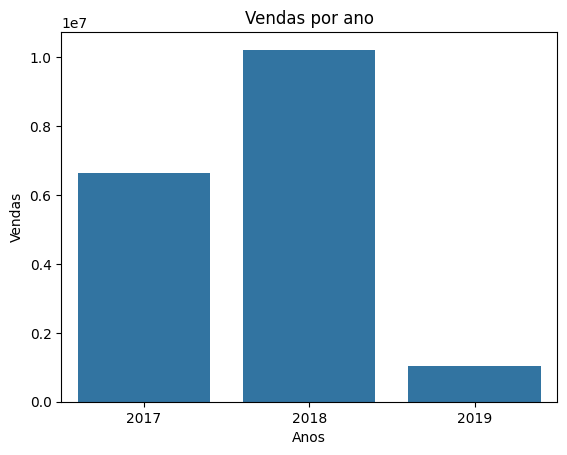

In [47]:
sns.barplot( data=df_final, x = 'Ano', y = 'valorTotal')
plt.title('Vendas por ano')
plt.xlabel('Anos')
plt.ylabel('Vendas')


In [48]:
df_metas.columns=['cdVendedor','data','meta']

In [51]:
df_data

,Data,Ano,Mes,MesNum,Dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5
...,...,...,...,...,...
1090,2019-12-27,2019,Dezembro,12,27
1091,2019-12-28,2019,Dezembro,12,28
1092,2019-12-29,2019,Dezembro,12,29
1093,2019-12-30,2019,Dezembro,12,30


In [60]:
#CONVERTER A COLUMA DATA NA TABELA METAS PARA FORMATO DE DATA

df_metas['data']=df_metas['data'].astype('datetime64[ns]')

# Converter o tipo de dado da coluna meta da tabela meta

df_metas['meta']= df_metas['meta'].astype('float')

df_metasAno= df_metasAno =pd.merge(
    df_metas[['data','meta']], 
    df_data[['Data','Ano']], 
    left_on='data',
    right_on='Data'
    )

df_metasAno = df_metasAno[['Ano','meta']].groupby('Ano').sum().reset_index()
df_metasAno.head()


,Ano,meta
0,2017,1.174900e+07
1,2018,1.208240e+07
2,2019,1.075291e+07


In [70]:
# Crie um grafico de linhas para exibir o comportamento das vendas ao longo do ano de 2018
df_result=pd.merge(df_final[['DataEmissao','QtdItens']],df_metas[['Data','Mes','MesNum']],left_on='DataEmissao',right_on='Data')


KeyError: "None of [Index(['DataEmissao', 'QtdItens'], dtype='object')] are in the [columns]"